## Credit Risk Dataset
This dataset contains columns simulating credit bureau data
* [Credit Risk Data](https://www.kaggle.com/datasets/laotse/credit-risk-dataset/data)

In [84]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Warnings remove alerts
import warnings
warnings.filterwarnings("ignore")


data = pd.read_csv('../data/raw/credit_risk_dataset.csv')
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
person_age,32581.0,NaN,NaN,NaN,27.7346,6.348078,20.0,23.0,26.0,30.0,144.0
person_income,32581.0,NaN,NaN,NaN,66074.84847,61983.119168,4000.0,38500.0,55000.0,79200.0,6000000.0
person_home_ownership,32581,4,RENT,16446,NaN,NaN,NaN,NaN,NaN,NaN,NaN
person_emp_length,31686.0,NaN,NaN,NaN,4.789686,4.14263,0.0,2.0,4.0,7.0,123.0
loan_intent,32581,6,EDUCATION,6453,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_grade,32581,7,A,10777,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_amnt,32581.0,NaN,NaN,NaN,9589.371106,6322.086646,500.0,5000.0,8000.0,12200.0,35000.0
loan_int_rate,29465.0,NaN,NaN,NaN,11.011695,3.240459,5.42,7.9,10.99,13.47,23.22
loan_status,32581.0,NaN,NaN,NaN,0.218164,0.413006,0.0,0.0,0.0,0.0,1.0
loan_percent_income,32581.0,NaN,NaN,NaN,0.170203,0.106782,0.0,0.09,0.15,0.23,0.83


1. person_age:
Mean age is around 27.73 years.
There are some outliers in the age column (like 144 years).
2. person_income:
Mean income is approximately $66,075.
Large standard deviation indicating high variance in income levels.
The minimum income is $4,000, and the maximum is $6,000,000, indicating potential outliers.
3. person_home_ownership:
Four unique categories (e.g., RENT, OWN, MORTGAGE, OTHER).
RENT is the most frequent category.
4. person_emp_length:
Average employment length is about 4.79 years.
There are some outliers with maximum values going up to 123 years.
5. loan_intent:
Six unique loan intents with EDUCATION being the most frequent.
6. loan_grade:
Seven unique loan grades, with 'A' being the most common.
7. loan_amnt:
Mean loan amount is approximately $9,589.
Some loans might be very high, indicated by the maximum value of $35,000.
8. loan_int_rate:
Average interest rate is around 11%.
There's a wide range of interest rates from approx 5.42% to 23.22%.
9. loan_status:
Binary indicator for default status (0 or 1).
10. loan_percent_income:
Indicates the percentage of income used for the loan.
Mean is 0.17 (or 17%), with some outliers up to 83%.
11. cb_person_default_on_file:
Indicates whether the person has any defaults on file (Y or N).
Majority of the data has 'N' (No defaults).
12. cb_person_cred_hist_length:
Average credit history length is around 5.8 years.

In [85]:
# 1. Handling Missing Values
print("Number of missing values ​​per column:")
print(data.isnull().sum())

Number of missing values ​​per column:
person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64


In [86]:
print("Number of NaN values ​​per column:")
print(data.isna().sum())

Number of NaN values ​​per column:
person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64


## Missing Values
1. person_emp_length
2. loan_int_rate

In [87]:

# Step 1: Impute missing loan_int_rate values based on loan_status
mean_loan_int_rate_0 = data[data['loan_status'] == 0]['loan_int_rate'].mean()
mean_loan_int_rate_1 = data[data['loan_status'] == 1]['loan_int_rate'].mean()

data.loc[(data['loan_status'] == 0) & (data['loan_int_rate'].isnull()), 'loan_int_rate'] = mean_loan_int_rate_0
data.loc[(data['loan_status'] == 1) & (data['loan_int_rate'].isnull()), 'loan_int_rate'] = mean_loan_int_rate_1

# Step 2: Impute missing person_emp_length values based on overall mean
mean_person_emp_length = data['person_emp_length'].mean()
data['person_emp_length'].fillna(mean_person_emp_length, inplace=True)

print(data.isnull().sum())
print(data.isna().sum())

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64


In [88]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
person_age,32581.0,NaN,NaN,NaN,27.7346,6.348078,20.0,23.0,26.0,30.0,144.0
person_income,32581.0,NaN,NaN,NaN,66074.84847,61983.119168,4000.0,38500.0,55000.0,79200.0,6000000.0
person_home_ownership,32581,4,RENT,16446,NaN,NaN,NaN,NaN,NaN,NaN,NaN
person_emp_length,32581.0,NaN,NaN,NaN,4.789686,4.085333,0.0,2.0,4.0,7.0,123.0
loan_intent,32581,6,EDUCATION,6453,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_grade,32581,7,A,10777,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_amnt,32581.0,NaN,NaN,NaN,9589.371106,6322.086646,500.0,5000.0,8000.0,12200.0,35000.0
loan_int_rate,32581.0,NaN,NaN,NaN,11.008507,3.099092,5.42,8.49,10.74,13.11,23.22
loan_status,32581.0,NaN,NaN,NaN,0.218164,0.413006,0.0,0.0,0.0,0.0,1.0
loan_percent_income,32581.0,NaN,NaN,NaN,0.170203,0.106782,0.0,0.09,0.15,0.23,0.83


### Summary Statistics

1. person_age:
Count: 32581
Mean: 27.73 years
Standard Deviation: 6.35 years
Min/Max: 20 / 144 (indicates outliers)
2. person_income:
Count: 32581
Mean: $66,074.85
Standard Deviation: $61,983.12
Min/Max: $4,000 / $6,000,000 (indicates outliers)
3. person_home_ownership:
Count: 32581
Unique: 4
Top: RENT (16,446 occurrences)
4. person_emp_length:
Count: 32581
Mean: 4.79 years
Standard Deviation: 4.08 years
Min/Max: 0 / 123 (indicates outliers)
5. loan_intent:
Count: 32581
Unique: 6
Top: EDUCATION (6,453 occurrences)
6. loan_grade:
Count: 32581
Unique: 7
Top: A (10,777 occurrences)
7. loan_amnt:
Count: 32581
Mean: $9,589.37
Standard Deviation: $6,322.09
Min/Max: $500 / $35,000
8. loan_int_rate:
Count: 32581
Mean: 11.01%
Standard Deviation: 3.10%
Min/Max: 5.42% / 23.22%
9. loan_status:
Count: 32581
Mean: 0.218 (21.8% defaults)
Standard Deviation: 0.413
Min/Max: 0/1
10. loan_percent_income:
Count: 32581
Mean: 0.17 (17%)
Standard Deviation: 0.106
Min/Max: 0 / 0.83
11. cb_person_default_on_file:
Count: 32581
Unique: 2
Top: No (26,836 occurrences)
12. cb_person_cred_hist_length:
Count: 32581
Mean: 5.80 years
Standard Deviation: 4.05 years
Min/Max: 2 / 30 years

In [89]:
# Remove Outliers for person_age and person_emp_lenght
data = data[data['person_age'] <= 65]

data.loc[data['person_emp_length'] == 123, 'person_emp_length'] = 23

In [90]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
person_age,32546.0,NaN,NaN,NaN,27.67824,6.064828,20.0,23.0,26.0,30.0,65.0
person_income,32546.0,NaN,NaN,NaN,65880.974559,52530.793054,4000.0,38500.0,55000.0,79200.0,2039784.0
person_home_ownership,32546,4,RENT,16421,NaN,NaN,NaN,NaN,NaN,NaN,NaN
person_emp_length,32546.0,NaN,NaN,NaN,4.78243,3.975033,0.0,2.0,4.0,7.0,38.0
loan_intent,32546,6,EDUCATION,6450,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_grade,32546,7,A,10765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_amnt,32546.0,NaN,NaN,NaN,9588.606895,6320.573516,500.0,5000.0,8000.0,12200.0,35000.0
loan_int_rate,32546.0,NaN,NaN,NaN,11.008521,3.099066,5.42,8.49,10.74,13.11,23.22
loan_status,32546.0,NaN,NaN,NaN,0.218245,0.413061,0.0,0.0,0.0,0.0,1.0
loan_percent_income,32546.0,NaN,NaN,NaN,0.170203,0.106767,0.0,0.09,0.15,0.23,0.83


In [91]:
# Analysis of categorical and numerical variables
categorical_features = data.select_dtypes(include=['object']).columns
numerical_features = data.select_dtypes(include=[np.number]).columns

print("\nCategorical Variables:", categorical_features)
print("Numeric Variables:", numerical_features)


Categorical Variables: Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')
Numeric Variables: Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length'],
      dtype='object')


In [92]:
# Analysis of categorical variables
for col in categorical_features:
    print(f"\nDistribution of categorical variable {col}:")
    print(data[col].value_counts())


Distribution of categorical variable person_home_ownership:
person_home_ownership
RENT        16421
MORTGAGE    13434
OWN          2584
OTHER         107
Name: count, dtype: int64

Distribution of categorical variable loan_intent:
loan_intent
EDUCATION            6450
MEDICAL              6052
VENTURE              5717
PERSONAL             5512
DEBTCONSOLIDATION    5210
HOMEIMPROVEMENT      3605
Name: count, dtype: int64

Distribution of categorical variable loan_grade:
loan_grade
A    10765
B    10442
C     6450
D     3621
E      963
F      241
G       64
Name: count, dtype: int64

Distribution of categorical variable cb_person_default_on_file:
cb_person_default_on_file
N    26809
Y     5737
Name: count, dtype: int64


### Encoding of Categorical Columns

In [93]:
# Encode person_home_ownership
data['is_homeowner'] = data['person_home_ownership'].apply(lambda x: 0 if x in ['RENT', 'OTHER'] else 1)
data.drop(columns=['person_home_ownership'], inplace=True)

# One-Hot Encoding for loan_intent
loan_intent_encoded = pd.get_dummies(data['loan_intent'], prefix='intent')
data = pd.concat([data, loan_intent_encoded], axis=1)
data.drop(columns=['loan_intent'], inplace=True)

# Ordinal Encoding for loan_grade
loan_grade_order = sorted(data['loan_grade'].unique())
ordinal_encoder = OrdinalEncoder(categories=[loan_grade_order])
data['loan_grade_encoded'] = ordinal_encoder.fit_transform(data[['loan_grade']]).astype(int)
data.drop(columns=['loan_grade'], inplace=True)

# Label Encoding for cb_person_default_on_file
label_encoder = LabelEncoder()
data['cb_person_default_on_file_encoded'] = label_encoder.fit_transform(data['cb_person_default_on_file'])
data.drop(columns=['cb_person_default_on_file'], inplace=True)

In [94]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
person_age,32546.0,NaN,NaN,NaN,27.67824,6.064828,20.0,23.0,26.0,30.0,65.0
person_income,32546.0,NaN,NaN,NaN,65880.974559,52530.793054,4000.0,38500.0,55000.0,79200.0,2039784.0
person_emp_length,32546.0,NaN,NaN,NaN,4.78243,3.975033,0.0,2.0,4.0,7.0,38.0
loan_amnt,32546.0,NaN,NaN,NaN,9588.606895,6320.573516,500.0,5000.0,8000.0,12200.0,35000.0
loan_int_rate,32546.0,NaN,NaN,NaN,11.008521,3.099066,5.42,8.49,10.74,13.11,23.22
loan_status,32546.0,NaN,NaN,NaN,0.218245,0.413061,0.0,0.0,0.0,0.0,1.0
loan_percent_income,32546.0,NaN,NaN,NaN,0.170203,0.106767,0.0,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,32546.0,NaN,NaN,NaN,5.786886,4.015456,2.0,3.0,4.0,8.0,30.0
is_homeowner,32546.0,NaN,NaN,NaN,0.492165,0.499946,0.0,0.0,0.0,1.0,1.0
intent_DEBTCONSOLIDATION,32546,2,False,27336,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Feature Engineering

1. person_age
2. person_income
3. person_emp_length

In [95]:
summary = data.describe()
print("Summary Statistics:")
print(summary)

Summary Statistics:
         person_age  person_income  person_emp_length     loan_amnt  \
count  32546.000000   3.254600e+04       32546.000000  32546.000000   
mean      27.678240   6.588097e+04           4.782430   9588.606895   
std        6.064828   5.253079e+04           3.975033   6320.573516   
min       20.000000   4.000000e+03           0.000000    500.000000   
25%       23.000000   3.850000e+04           2.000000   5000.000000   
50%       26.000000   5.500000e+04           4.000000   8000.000000   
75%       30.000000   7.920000e+04           7.000000  12200.000000   
max       65.000000   2.039784e+06          38.000000  35000.000000   

       loan_int_rate   loan_status  loan_percent_income  \
count   32546.000000  32546.000000         32546.000000   
mean       11.008521      0.218245             0.170203   
std         3.099066      0.413061             0.106767   
min         5.420000      0.000000             0.000000   
25%         8.490000      0.000000           


Ranges:
Age Range: 45
Income Range: 2035784
Employment Length Range: 38.0


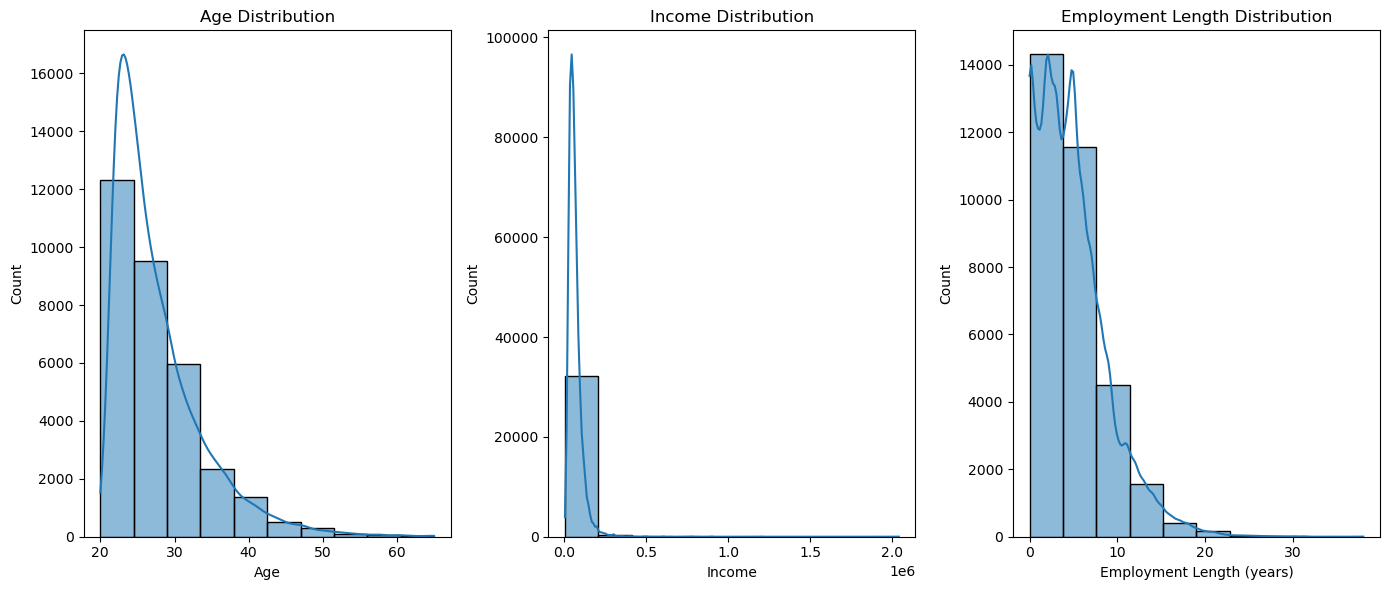

In [96]:
# Range
range_age = data['person_age'].max() - data['person_age'].min()
range_income = data['person_income'].max() - data['person_income'].min()
range_emp_length = data['person_emp_length'].max() - data['person_emp_length'].min()

print("\nRanges:")
print(f"Age Range: {range_age}")
print(f"Income Range: {range_income}")
print(f"Employment Length Range: {range_emp_length}")

# Plotting histograms
plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
sns.histplot(data['person_age'], bins=10, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')

plt.subplot(1, 3, 2)
sns.histplot(data['person_income'], bins=10, kde=True)
plt.title('Income Distribution')
plt.xlabel('Income')

plt.subplot(1, 3, 3)
sns.histplot(data['person_emp_length'], bins=10, kde=True)
plt.title('Employment Length Distribution')
plt.xlabel('Employment Length (years)')

plt.tight_layout()
plt.show()

In [97]:
# Binning person_age
age_bins = [18, 25, 30, 35, 45, 55, 65]
age_labels = ['18-25', '26-30', '31-35', '36-45', '46-55', '56-65']
data['age_bracket'] = pd.cut(data['person_age'], bins=age_bins, labels=age_labels, right=False)

# Binning person_income
income_bins = [0, 30000, 60000, 90000, 120000, 150000, 2000000]
income_labels = ['<30k', '30k-60k', '60k-90k', '90k-120k', '120k-150k', '150k+']
data['income_bracket'] = pd.cut(data['person_income'], bins=income_bins, labels=income_labels, right=False)

# Binning person_emp_length
emp_length_bins = [0, 2, 5, 10, 20, 50]
emp_length_labels = ['0-2', '2-5', '5-10', '10-20', '20+']
data['emp_length_bracket'] = pd.cut(data['person_emp_length'], bins=emp_length_bins, labels=emp_length_labels, right=False)

# One-Hot Encoding
data = pd.get_dummies(data, columns=['age_bracket', 'income_bracket', 'emp_length_bracket'], drop_first=True)

In [98]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
person_age,32546.0,NaN,NaN,NaN,27.67824,6.064828,20.0,23.0,26.0,30.0,65.0
person_income,32546.0,NaN,NaN,NaN,65880.974559,52530.793054,4000.0,38500.0,55000.0,79200.0,2039784.0
person_emp_length,32546.0,NaN,NaN,NaN,4.78243,3.975033,0.0,2.0,4.0,7.0,38.0
loan_amnt,32546.0,NaN,NaN,NaN,9588.606895,6320.573516,500.0,5000.0,8000.0,12200.0,35000.0
loan_int_rate,32546.0,NaN,NaN,NaN,11.008521,3.099066,5.42,8.49,10.74,13.11,23.22
loan_status,32546.0,NaN,NaN,NaN,0.218245,0.413061,0.0,0.0,0.0,0.0,1.0
loan_percent_income,32546.0,NaN,NaN,NaN,0.170203,0.106767,0.0,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,32546.0,NaN,NaN,NaN,5.786886,4.015456,2.0,3.0,4.0,8.0,30.0
is_homeowner,32546.0,NaN,NaN,NaN,0.492165,0.499946,0.0,0.0,0.0,1.0,1.0
intent_DEBTCONSOLIDATION,32546,2,False,27336,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32546 entries, 0 to 32579
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   person_age                         32546 non-null  int64  
 1   person_income                      32546 non-null  int64  
 2   person_emp_length                  32546 non-null  float64
 3   loan_amnt                          32546 non-null  int64  
 4   loan_int_rate                      32546 non-null  float64
 5   loan_status                        32546 non-null  int64  
 6   loan_percent_income                32546 non-null  float64
 7   cb_person_cred_hist_length         32546 non-null  int64  
 8   is_homeowner                       32546 non-null  int64  
 9   intent_DEBTCONSOLIDATION           32546 non-null  bool   
 10  intent_EDUCATION                   32546 non-null  bool   
 11  intent_HOMEIMPROVEMENT             32546 non-null  bool   


### Normalization

In [100]:

# Log Transformation for person_age
data['person_age_log'] = np.log1p(data['person_age'])

# Standardization for person_income
scaler_person_income = StandardScaler()
data['person_income_standardized'] = scaler_person_income.fit_transform(data[['person_income']])

# Standardization for person_emp_length
scaler_person_emp_length = StandardScaler()
data['person_emp_length_standardized'] = scaler_person_emp_length.fit_transform(data[['person_emp_length']])

# Standardization for loan_amnt
scaler_loan_amnt = StandardScaler()
data['loan_amnt_standardized'] = scaler_loan_amnt.fit_transform(data[['loan_amnt']])

# Log Transformation for loan_int_rate
data['loan_int_rate_log'] = np.log1p(data['loan_int_rate'])

# Log Transformation for loan_percent_income
data['loan_percent_income_log'] = np.log1p(data['loan_percent_income'])

# Log Transformation for cb_person_cred_hist_length
data['cb_person_cred_hist_length_log'] = np.log1p(data['cb_person_cred_hist_length'])

# Drop the original columns
columns_to_drop = [
    'person_age', 
    'person_income', 
    'person_emp_length', 
    'loan_amnt', 
    'loan_int_rate', 
    'loan_percent_income', 
    'cb_person_cred_hist_length'
]
data.drop(columns=columns_to_drop, inplace=True)

In [101]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
loan_status,32546.0,NaN,NaN,NaN,0.218245,0.413061,0.0,0.0,0.0,0.0,1.0
is_homeowner,32546.0,NaN,NaN,NaN,0.492165,0.499946,0.0,0.0,0.0,1.0,1.0
intent_DEBTCONSOLIDATION,32546,2,False,27336,NaN,NaN,NaN,NaN,NaN,NaN,NaN
intent_EDUCATION,32546,2,False,26096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
intent_HOMEIMPROVEMENT,32546,2,False,28941,NaN,NaN,NaN,NaN,NaN,NaN,NaN
intent_MEDICAL,32546,2,False,26494,NaN,NaN,NaN,NaN,NaN,NaN,NaN
intent_PERSONAL,32546,2,False,27034,NaN,NaN,NaN,NaN,NaN,NaN,NaN
intent_VENTURE,32546,2,False,26829,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_grade_encoded,32546.0,NaN,NaN,NaN,1.218153,1.166347,0.0,0.0,1.0,2.0,6.0
cb_person_default_on_file_encoded,32546.0,NaN,NaN,NaN,0.176274,0.381059,0.0,0.0,0.0,0.0,1.0


## Save Data Preprocessed

In [102]:
import sqlite3 #library to work with sql
conn = sqlite3.connect('../data/sql/processed_credit_risk_dataset.db') #data path for .db file


data.to_csv('../data/processed/processed_credit_risk_dataset.csv') 
data.to_sql('credit_risk_dataset', con = conn, if_exists='replace', index=False) 

32546